1. Суть проблемы -- какую боль, проблему, задачу вы хотите изучить

Изучение возможности определения рака груди 



2. Ее актуальность -- откуда взята эта проблема, где она распространена и как ваша модель поможет ее решить

Проблема рака груди актуальна во многих странах. Моя модель поможет способствовать раннему выявлению и повышению эффективности лечения.



3. Какие данные Вы используете в своем проекте.

- https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

- 569 строк



4. Ваша гипотеза.

  буду использовать случайный лес

In [1]:
from pandas.plotting import scatter_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
data = pd.read_csv("breast_cancer.csv")

In [3]:

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
data['diagnosis'].unique

<bound method Series.unique of 0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
data.drop("Unnamed: 32",axis=1,inplace=True)

In [8]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
data.drop("id",axis=1,inplace=True)

In [10]:
features_mean= list(data.columns[1:11])
features_se= list(data.columns[11:20])
features_worst=list(data.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [11]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

In [12]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: >

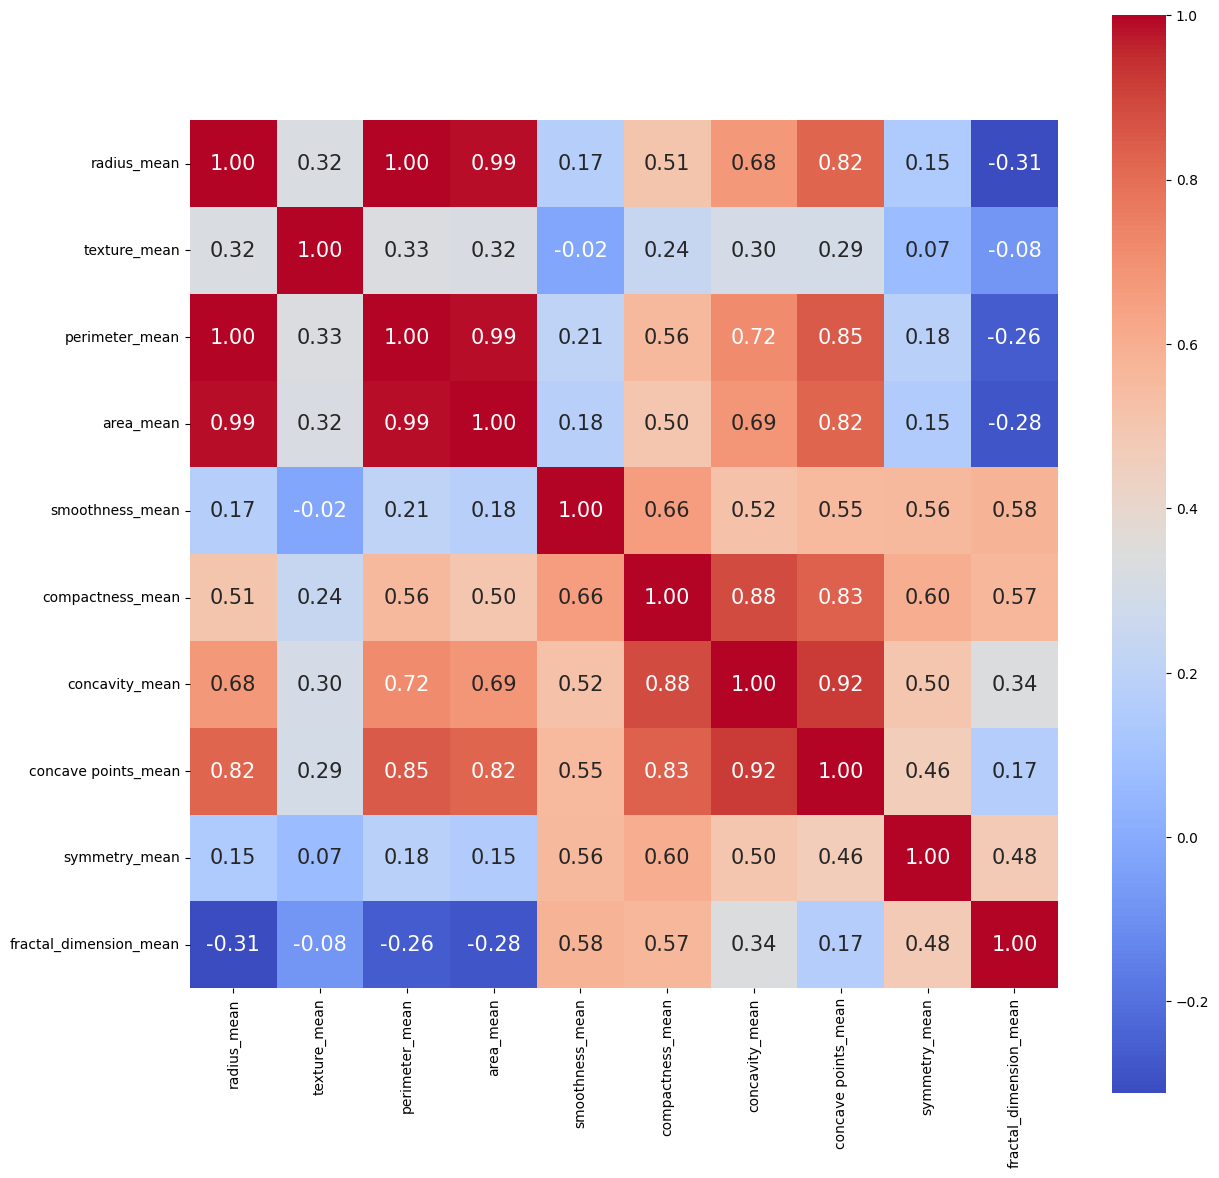

In [13]:
corr = data[features_mean].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm') 

- радиус, параметр и площадь сильно коррелируют, как и ожидалось, поэтому буду использовать любой из них.
- compactness_mean, concavity_mean и concave points_mean сильно коррелируют, поэтому мы будем использовать compactness_mean.

Исходя из этого выбранные параметры для дальнейшего исследования: texture_mean, radius_mean, smoothness_mean, compactness_mean, symmetry_mean

In [14]:
prediction_var = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean']

In [15]:
train, test = train_test_split(data, test_size = 0.3)

print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


In [16]:
train_X = train[prediction_var]
train_y = train.diagnosis

test_X = test[prediction_var]
test_y = test.diagnosis

In [17]:
model=RandomForestClassifier(n_estimators=100)

In [18]:
model.fit(train_X,train_y)

RandomForestClassifier()

In [19]:
prediction = model.predict(test_X)

In [20]:
metrics.accuracy_score(prediction,test_y)

0.9181286549707602

In [21]:
prediction_var = features_mean

In [22]:
train_X = train[prediction_var]
train_y = train.diagnosis

test_X = test[prediction_var]
test_y = test.diagnosis

In [23]:
model=RandomForestClassifier(n_estimators=100)

In [24]:
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9415204678362573

In [25]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)

print(featimp)

concave points_mean       0.288842
area_mean                 0.187069
perimeter_mean            0.130204
concavity_mean            0.127247
radius_mean               0.106757
texture_mean              0.052138
compactness_mean          0.049748
smoothness_mean           0.024582
symmetry_mean             0.018554
fractal_dimension_mean    0.014860
dtype: float64


In [26]:
prediction_var=['concave points_mean', 'concavity_mean', 'radius_mean', 'perimeter_mean', 'area_mean']      

In [27]:
train_X = train[prediction_var]
train_y = train.diagnosis

test_X = test[prediction_var]
test_y = test.diagnosis

In [28]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9239766081871345

In [29]:
prediction_var = features_worst

In [30]:
train_X = train[prediction_var]
train_y = train.diagnosis

test_X = test[prediction_var]
test_y = test.diagnosis

In [31]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9532163742690059

In [32]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)

print(featimp)

perimeter_worst            0.209515
area_worst                 0.201307
radius_worst               0.193236
concave points_worst       0.180914
concavity_worst            0.068892
compactness_worst          0.037653
texture_worst              0.033465
smoothness_worst           0.033323
symmetry_worst             0.021049
fractal_dimension_worst    0.020647
dtype: float64


In [33]:
prediction_var = ['radius_worst', 'concave points_worst', 'area_worst', 'perimeter_worst', 'concavity_worst'] 

In [34]:
train_X = train[prediction_var]
train_y = train.diagnosis

test_X = test[prediction_var]
test_y = test.diagnosis

In [35]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9532163742690059

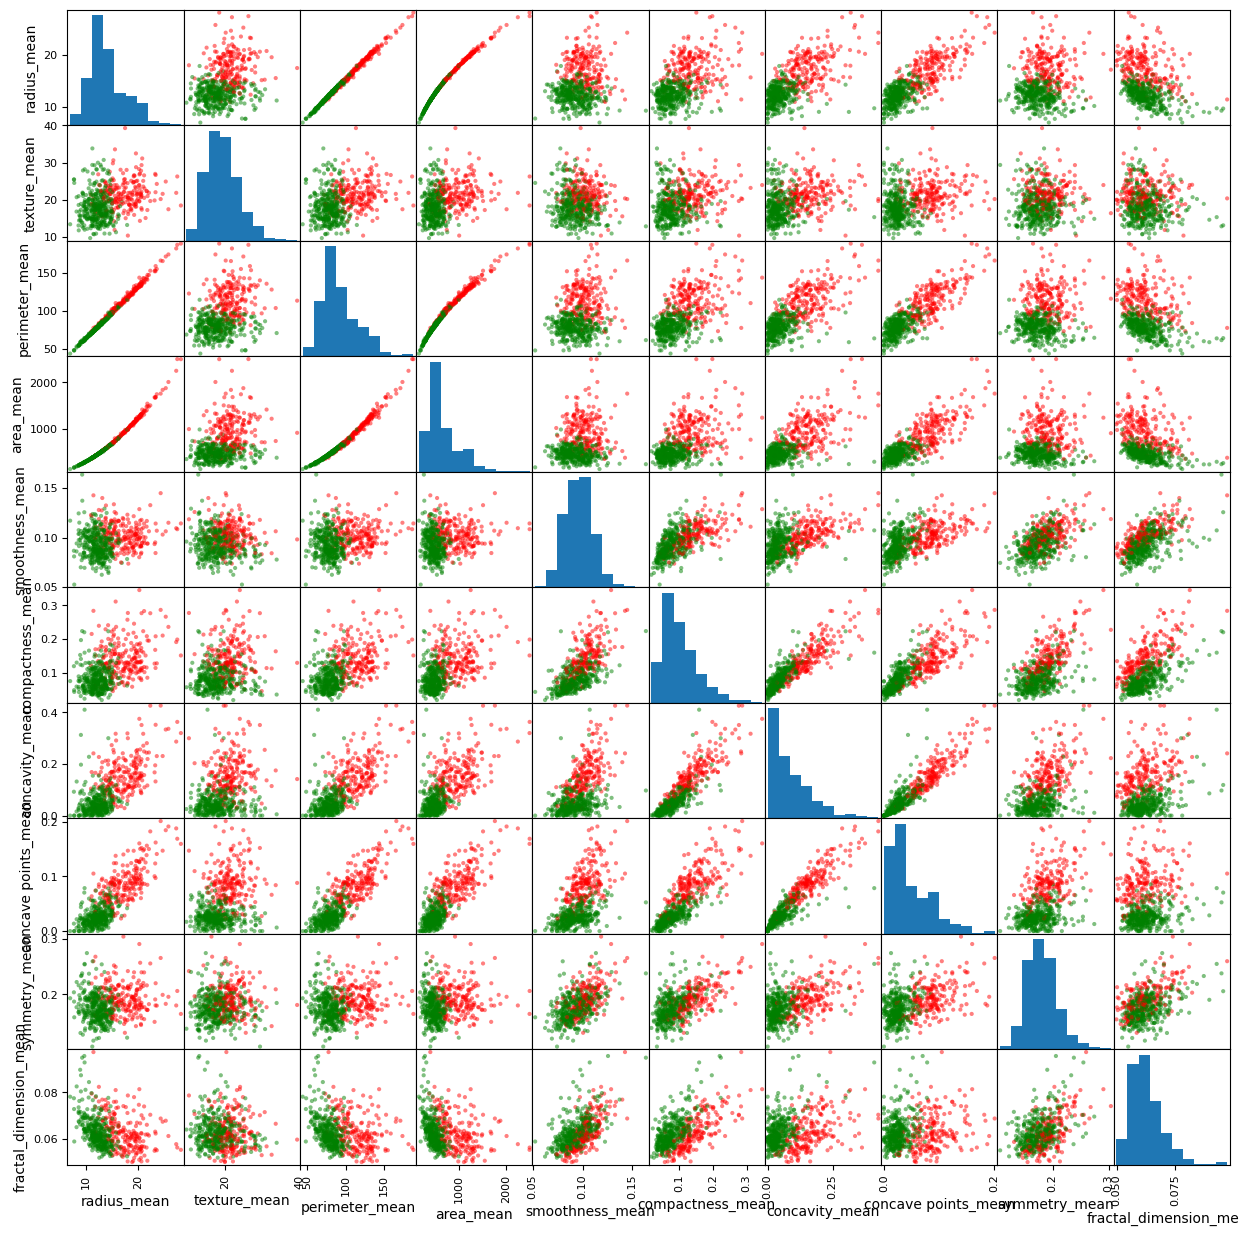

In [36]:
color_function = {0: "green", 1: "red"}
colors = data["diagnosis"].map(lambda x: color_function.get(x))
scatter_matrix(data[features_mean], c=colors, alpha = 0.5, figsize = (15, 15));

In [37]:
from sklearn.model_selection import KFold

def model(model, data, prediction, outcome):
    kf = KFold(data.shape[0], n_folds=10)

In [38]:
def class_model(model, data, prediction_input, output):
    model.fit(data[prediction_input], data[output])
  
    predictions = model.predict(data[prediction_input])
  
    accuracy = metrics.accuracy_score(predictions,data[output])
    print("Accuracy: %s" % "{0:.2%}".format(accuracy))
 
    
    kf = KFold(n_splits=5)
    error = []

    for train_index, test_index in kf.split(data):
        train_X = data[prediction_input].iloc[train_index,:]
        train_y = data[output].iloc[train_index]
        model.fit(train_X, train_y)
    
        test_X = data[prediction_input].iloc[test_index,:]
        test_y = data[output].iloc[test_index]
        error.append(model.score(test_X, test_y))
        
    print("CV: %s" % "{0:.2%}".format(np.mean(error)))

In [39]:
model = RandomForestClassifier(n_estimators=100)

predictor_var = ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concave points_mean']
outcome_var= "diagnosis"

class_model(model,data,prediction_var,outcome_var)

Accuracy: 100.00%
CV: 92.97%


In [40]:
data_X= data[prediction_var]
data_y= data["diagnosis"]

In [41]:
from sklearn.model_selection import GridSearchCV

def gridsearch(model, param_grid, data_X, data_y):
    clf = GridSearchCV(model, param_grid, cv=10, scoring="accuracy", n_jobs=-1)
    
    clf.fit(train_X,train_y)
    print("Best parameter is: ")
    print(clf.best_params_)

    print("Best estimator is: ")
    print(clf.best_estimator_)

    print("Best score is: ")
    print(clf.best_score_)

In [42]:
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gridsearch(model, param_grid, data_X, data_y)

Best parameter is: 
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best estimator is: 
RandomForestClassifier(n_estimators=200)
Best score is: 
0.9471794871794872
